# Importing Libraries

In [577]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns 

# Data exploration

In [578]:
sms=pd.read_csv('spam.csv', encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [579]:
sms= sms.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
sms= sms.rename(columns={"v1": "label" , "v2": "text"})
sms.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [580]:
print(len(sms))

5572


In [581]:
sms.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [592]:
sms['characters']=sms['text'].apply(len)
sms.head()

,label,text,characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [594]:
nltk.download('punkt')
sms['words']=sms['text'].apply(lambda x:len(nltk.word_tokenize(x)))
sms.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\himas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,label,text,characters,words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


# Plots from data 

<Axes: ylabel='Frequency'>

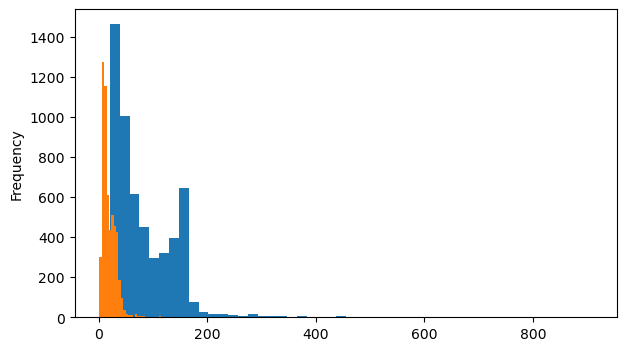

In [596]:
sms['characters'].plot(bins=50, kind='hist', figsize=(7,4))
sms['words'].plot(bins=50, kind='hist', figsize=(7,4))

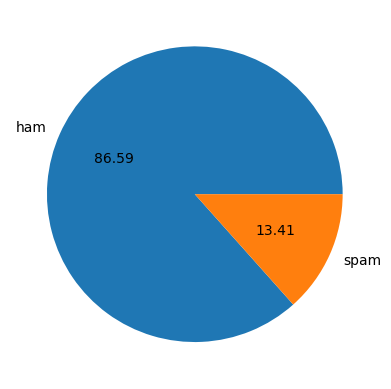

In [598]:
plt.pie(sms.label.value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [600]:
sms.loc[:,'label']= sms.label.map({'ham':0, 'spam':1})
sms.head()

,label,text,characters,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


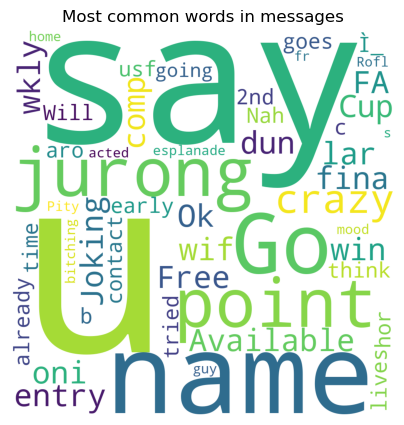

In [606]:
!pip install wordcloud
from wordcloud import WordCloud
wordcloud= WordCloud(background_color='White',width=1000,height=1000,max_words=50).generate(str(sms['text']))
plt.rcParams["figure.figsize"]=(5,5)
plt.title("Most common words in messages")
plt.axis("off")
plt.imshow(wordcloud)

# Implement bag of words approach

In [559]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
count=CountVectorizer()
input=['i am ok']
text=count.fit_transform(sms['text'],input)
x_train, x_test, y_train, y_test = train_test_split(text, sms['label'], test_size=0.20, random_state=1)

In [561]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [563]:
print(x_train.shape)
print(x_test.shape)

input=text[5571]

(4457, 8672)
(1115, 8672)


# Implementation of Naive Bayes ML model

In [565]:
from sklearn.naive_bayes import MultinomialNB
model= MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [567]:
prediction=model.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [569]:
from sklearn.metrics import accuracy_score, precision_score , recall_score, f1_score
print("Naive Bayes Classification(MutinomialNB) : ")
print("Accuracy score: {}".format(accuracy_score(y_test,prediction)))
print("Precision score: {}".format(precision_score(y_test,prediction)))
print("Recall score: {}".format(recall_score(y_test,prediction)))
print("f1 score: {}".format(f1_score(y_test,prediction)))

Naive Bayes Classification(MutinomialNB) : 
Accuracy score: 0.97847533632287
Precision score: 0.891156462585034
Recall score: 0.9424460431654677
f1 score: 0.916083916083916


In [608]:
from sklearn.naive_bayes import BernoulliNB
model= BernoulliNB()
model.fit(x_train,y_train)

BernoulliNB()

In [ ]:
# Evaluating BernoulliNB algo

In [610]:
prediction=model.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score , recall_score, f1_score
print("Naive Bayes Classification(BernoulliNB) : ")
print("Accuracy score: {}".format(accuracy_score(y_test,prediction)))
print("Precision score: {}".format(precision_score(y_test,prediction)))
print("Recall score: {}".format(recall_score(y_test,prediction)))
print("f1 score: {}".format(f1_score(y_test,prediction)))

Naive Bayes Classification(BernoulliNB) : 
Accuracy score: 0.9865470852017937
Precision score: 0.984375
Recall score: 0.9064748201438849
f1 score: 0.9438202247191011


# Implementation of Neural Networks

In [571]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier()
model.fit(x_train,y_train)

MLPClassifier()

In [572]:
prediction=model.predict(x_test)

In [573]:
from sklearn.metrics import accuracy_score, precision_score , recall_score, f1_score
print("Neural Networks(MLPClassifier): ")
print("Accuracy score: {}".format(accuracy_score(y_test,prediction)))
print("Precision score: {}".format(precision_score(y_test,prediction)))
print("Recall score: {}".format(recall_score(y_test,prediction)))
print("f1 score: {}".format(f1_score(y_test,prediction)))

Neural Networks(MLPClassifier): 
Accuracy score: 0.9928251121076234
Precision score: 1.0
Recall score: 0.9424460431654677
f1 score: 0.9703703703703703


# Detecting user input text

In [574]:
input

<1x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [575]:
prediction=model.predict(input)
if (prediction==1):
    print('Input is a Spam sms')
else:
    print('Input is a Ham sms')

Input is a Ham sms
